In [18]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn import neighbors
from sklearn import linear_model

In [19]:
test_data=pd.read_excel("Test_dataset.xlsx")
test_data.head().transpose()

,0,1,2,3,4
people_ID,5942,18664,5603,5649,5099
Region,Delhi,Delhi,Delhi,Delhi,Delhi
Gender,Female,Male,Female,Female,Female
Designation,Mrs,Mr,Mrs,Mrs,Mrs
Name,smt rekha prajapat,nirmal,pinky,pooja @aafrin,anjali
Married,YES,YES,YES,YES,YES
Children,2,2,2,2,2
Occupation,Driver,Legal,Sales,Sales,Business
Mode_transport,Public,Walk,Car,Car,Car
cases/1M,4,4,4,4,4


In [20]:
train_data = pd.read_excel("Train_dataset.xlsx")

In [21]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
people_ID,14498.0,1.446996e+04,6.826922e+03,3887.0,7747.25,16467.5,20315.75,25212.0
Children,14498.0,9.789626e-01,8.118332e-01,0.0,0.00,1.0,2.00,2.0
cases/1M,14498.0,5.886743e+00,4.651725e+00,0.0,3.00,4.0,11.00,13.0
Deaths/1M,14498.0,1.342737e+00,9.535657e-01,0.0,1.00,1.0,2.00,3.0
Age,14498.0,4.208367e+01,1.532643e+01,16.0,29.00,42.0,55.00,68.0
Coma score,14498.0,8.985860e+00,3.754762e+00,3.0,6.00,9.0,12.00,15.0
Diuresis,14498.0,2.806576e+02,9.824068e+01,110.0,195.00,280.0,366.00,450.0
Platelets,14498.0,8.688647e+01,4.219445e+01,15.0,51.00,87.0,124.00,160.0
HBB,14498.0,1.140830e+02,5.520797e+01,20.0,66.00,113.0,162.00,210.0
d-dimer,14498.0,2.746673e+02,4.370616e+01,200.0,237.00,274.0,312.00,350.0


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   Region                  10714 non-null  object 
 2   Gender                  10714 non-null  object 
 3   Designation             10714 non-null  object 
 4   Name                    10694 non-null  object 
 5   Married                 10714 non-null  object 
 6   Children                10403 non-null  float64
 7   Occupation              9967 non-null   object 
 8   Mode_transport          10711 non-null  object 
 9   cases/1M                10714 non-null  int64  
 10  Deaths/1M               10714 non-null  int64  
 11  comorbidity             10488 non-null  object 
 12  Age                     10714 non-null  int64  
 13  Coma score              10714 non-null  int64  
 14  Pulmonary score         10714 non-null

In [23]:
train_data = pd.read_excel("Train_dataset.xlsx")
train_data.tail()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
10709,22691,Bengaluru,Male,Mr,ashish,NO,2.0,Business,Car,8,...,24.0,209.0,61.0,56.0,35,7,4000000.0,300000,0.0,41.981760
10710,22692,Bengaluru,Male,Mr,mohd mujahid ansari,YES,0.0,Manufacturing,Car,8,...,134.0,211.0,65.0,47.0,35,7,1500000.0,700000,NaN,47.148663
10711,22693,Bengaluru,Male,Mr,munnakumar,YES,0.0,Clerk,Public,8,...,151.0,296.0,87.0,37.0,16,5,3000000.0,2100000,2.0,47.708533
10712,22694,Bengaluru,Male,Mr,prakash,YES,1.0,Legal,Walk,8,...,110.0,253.0,56.0,70.0,28,5,2900000.0,700000,1.0,53.803565
10713,22695,Bengaluru,Male,Mr,mehboob mehandi,NO,2.0,Business,Car,8,...,134.0,201.0,82.0,60.0,4,3,2100000.0,1400000,0.0,68.342400


In [24]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
people_ID,10714.0,1.008489e+04,7.108664e+03,1.0000,2.679250e+03,1.000350e+04,1.514175e+04,22695.000
Children,10403.0,1.062770e+00,8.182223e-01,0.0000,0.000000e+00,1.000000e+00,2.000000e+00,2.000
cases/1M,10714.0,3.285888e+00,2.721274e+00,1.0000,2.000000e+00,2.000000e+00,4.000000e+00,8.000
Deaths/1M,10714.0,5.232406e-01,8.543033e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,2.000
Age,10714.0,4.208372e+01,1.532340e+01,16.0000,2.900000e+01,4.200000e+01,5.500000e+01,68.000
Coma score,10714.0,9.013067e+00,3.714970e+00,3.0000,6.000000e+00,9.000000e+00,1.200000e+01,15.000
Diuresis,9998.0,2.788063e+02,9.798553e+01,110.0000,1.940000e+02,2.760000e+02,3.640000e+02,450.000
Platelets,9790.0,8.779581e+01,4.185110e+01,15.0000,5.200000e+01,8.800000e+01,1.240000e+02,160.000
HBB,10698.0,1.161710e+02,5.517881e+01,20.0000,6.800000e+01,1.170000e+02,1.650000e+02,210.000
d-dimer,9600.0,2.752923e+02,4.366969e+01,200.0000,2.370000e+02,2.760000e+02,3.130000e+02,350.000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B59FAC248>,
      dtype=object)

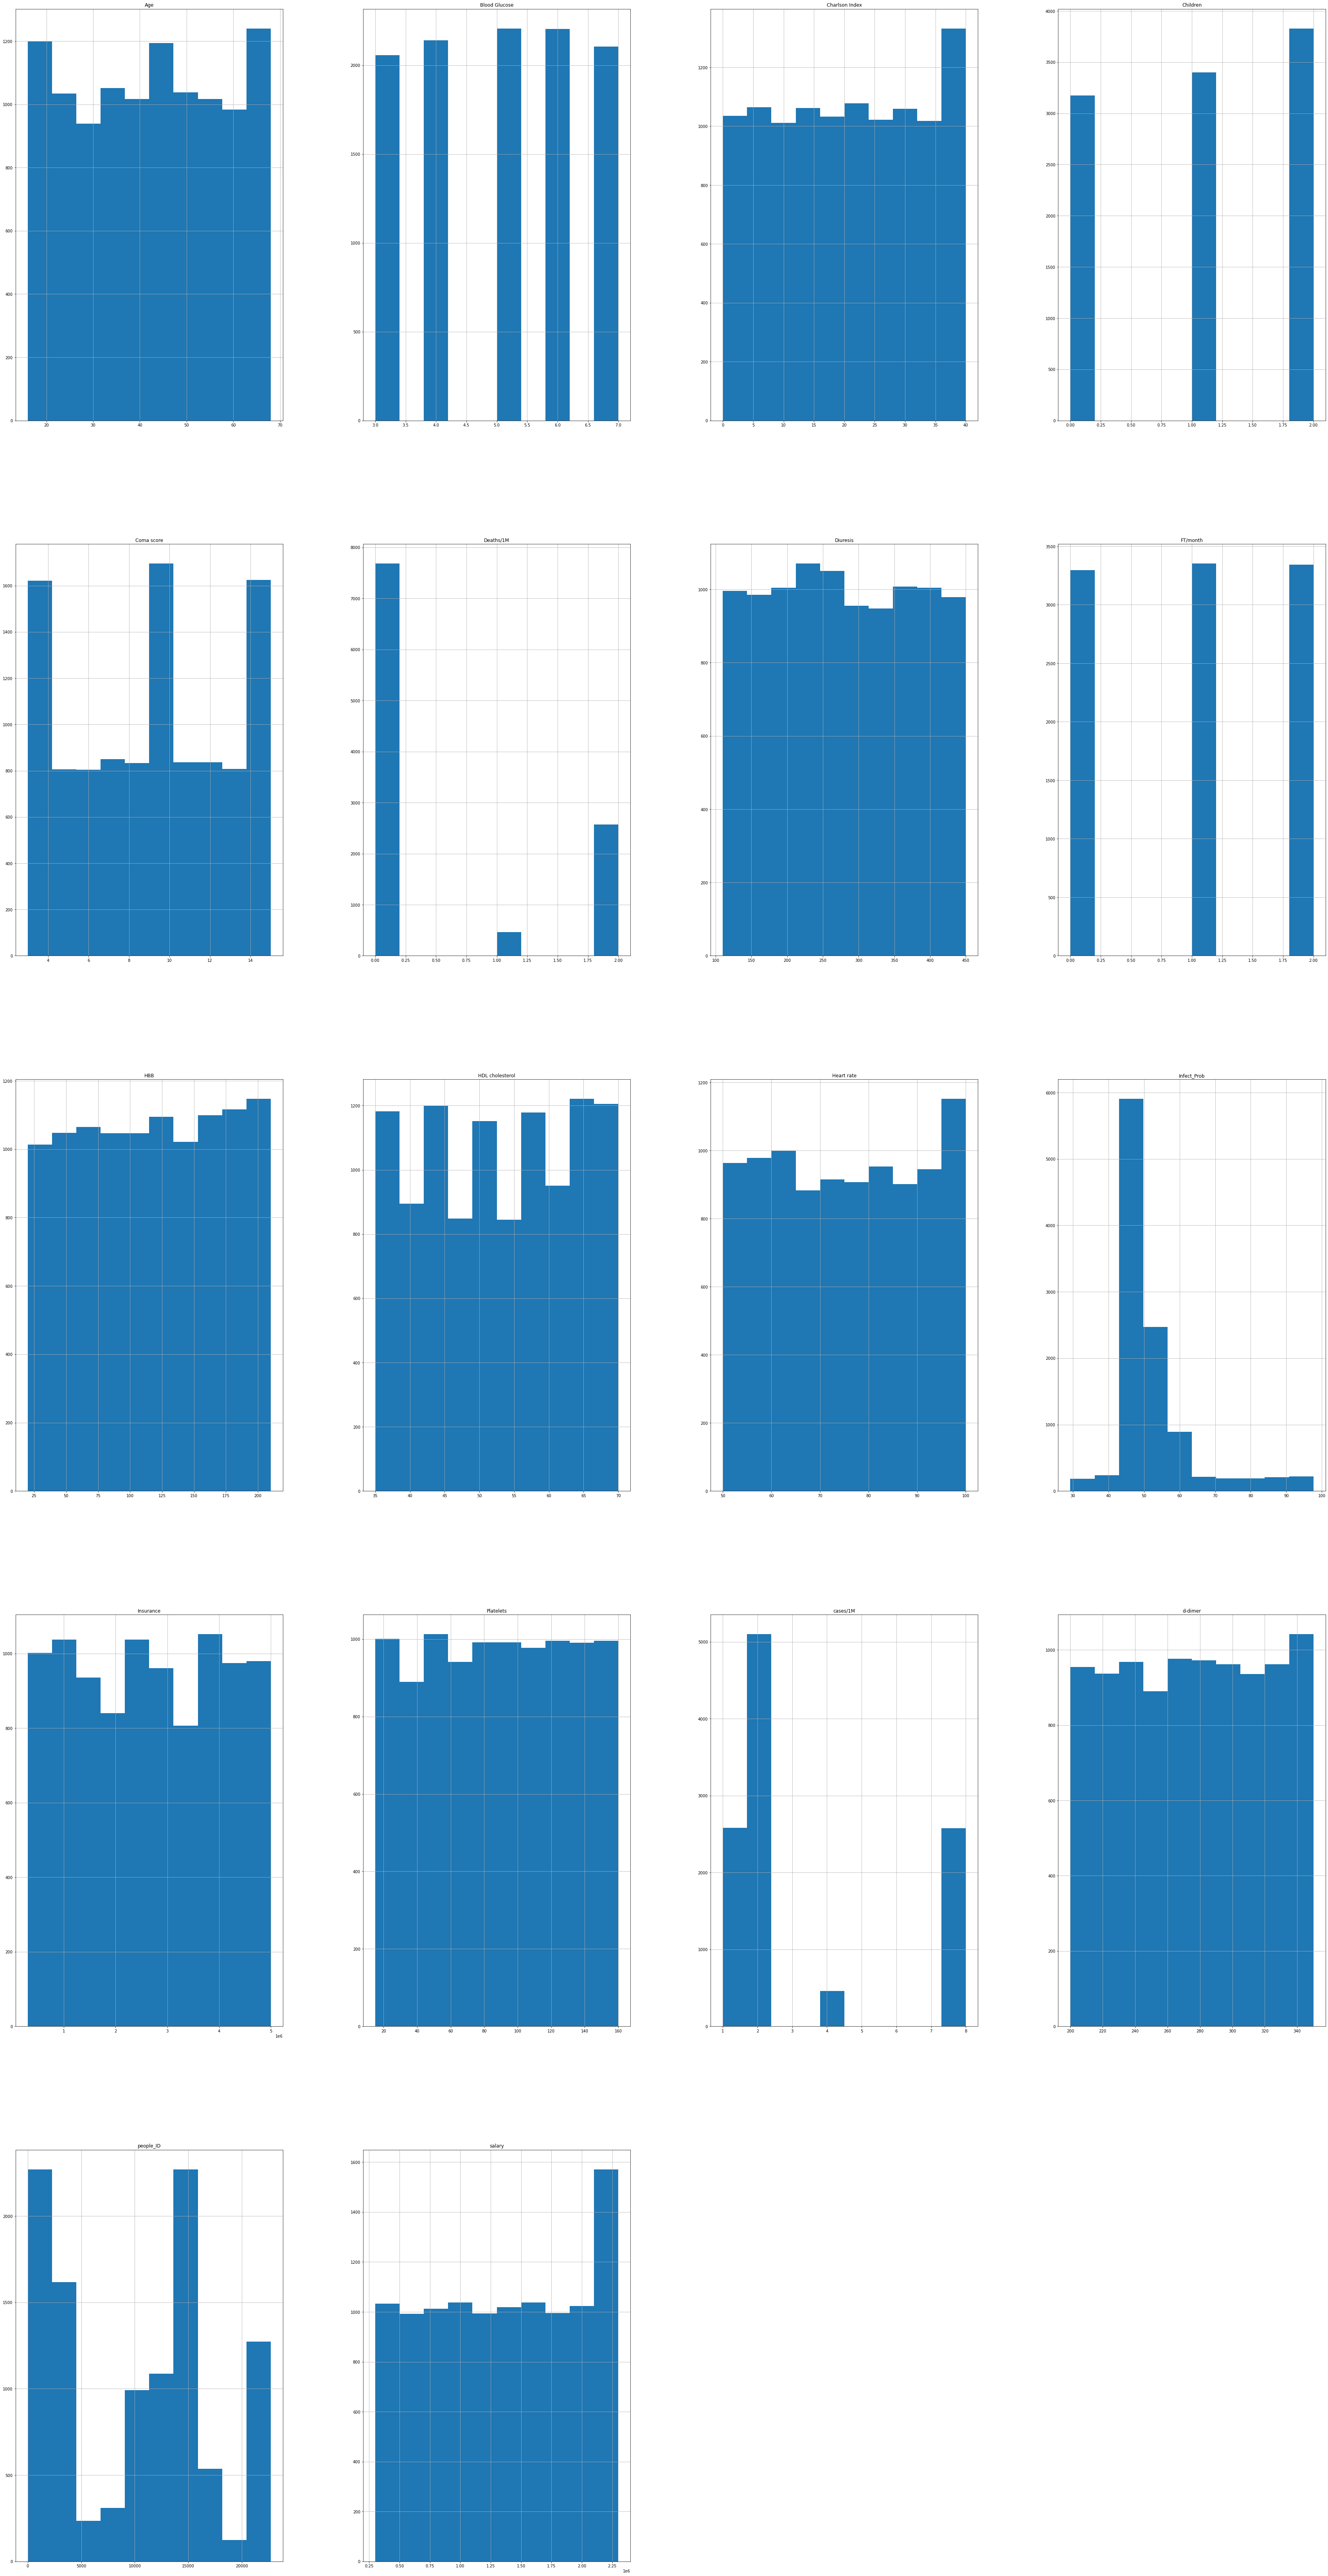

In [25]:
rcParams['figure.figsize'] = 60, 120
train_data.hist()

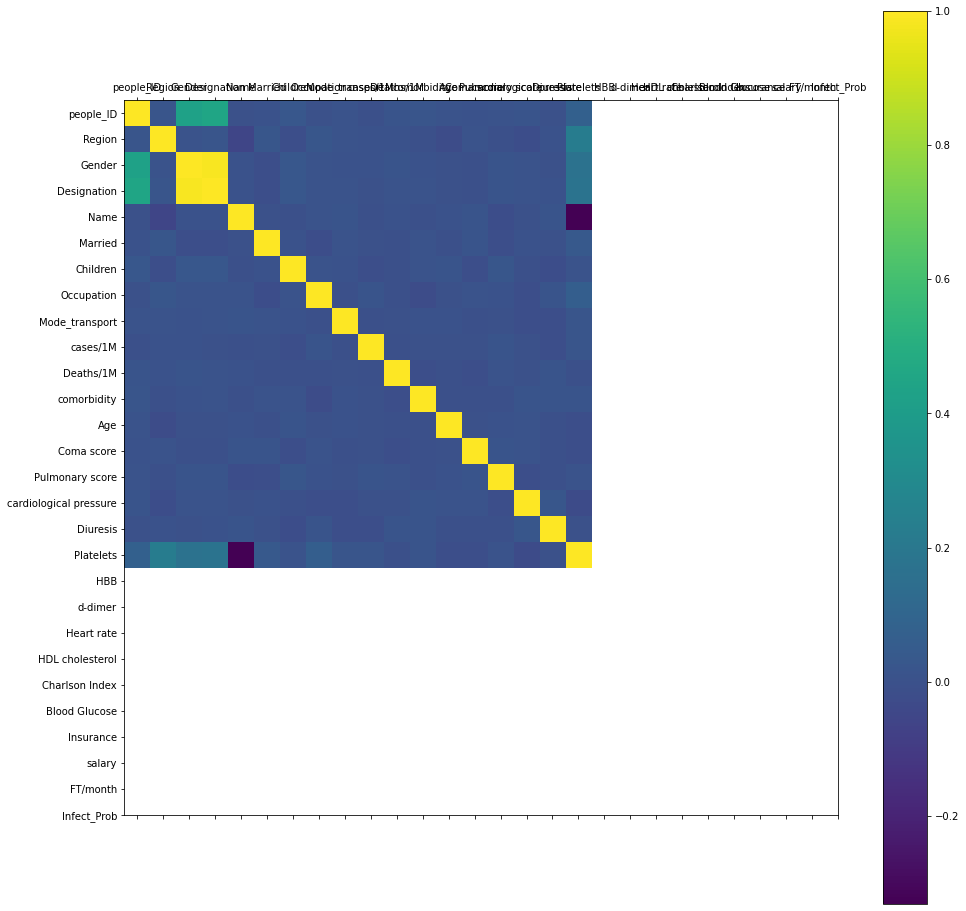

In [26]:
rcParams['figure.figsize'] = 30, 28
plt.matshow(train_data.corr())
plt.yticks(np.arange(train_data.shape[1]), train_data.columns)
plt.xticks(np.arange(train_data.shape[1]), train_data.columns)
plt.colorbar()

In [27]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   people_ID               10714 non-null  int64  
 1   Region                  10714 non-null  object 
 2   Gender                  10714 non-null  object 
 3   Designation             10714 non-null  object 
 4   Name                    10694 non-null  object 
 5   Married                 10714 non-null  object 
 6   Children                10403 non-null  float64
 7   Occupation              9967 non-null   object 
 8   Mode_transport          10711 non-null  object 
 9   cases/1M                10714 non-null  int64  
 10  Deaths/1M               10714 non-null  int64  
 11  comorbidity             10488 non-null  object 
 12  Age                     10714 non-null  int64  
 13  Coma score              10714 non-null  int64  
 14  Pulmonary score         10714 non-null

In [28]:
train_data = pd.get_dummies(train_data, columns = ['Region', 'Gender','Married', 'Designation', 'Occupation', 'Mode_transport','comorbidity', 'Pulmonary score', 'cardiological pressure'])
standardScaler = StandardScaler()

In [29]:
columns_to_scale = ['Age', 'Children', 'cases/1M', 'Deaths/1M', 'Charlson Index','Blood Glucose','salary']
train_data[columns_to_scale] = standardScaler.fit_transform(train_data[columns_to_scale])

In [30]:
train_data=train_data.fillna(0)

In [31]:
y = train_data['Infect_Prob']
X = train_data.drop(['Infect_Prob','Name','Designation_Mr','Designation_Mrs'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [32]:
X_train.head().transpose()

,7593,6086,6492,1326,1252
people_ID,14700.000000,13193.000000,1.359900e+04,1.327000e+03,1.253000e+03
Children,-1.298940,1.145501,1.145501e+00,-1.298940e+00,1.145501e+00
cases/1M,-0.472554,-0.472554,-4.725535e-01,-4.725535e-01,-4.725535e-01
Deaths/1M,-0.612505,-0.612505,-6.125050e-01,-6.125050e-01,-6.125050e-01
Age,-0.919142,1.691367,1.430316e+00,-1.359894e-01,-3.317776e-01
Coma score,6.000000,13.000000,1.000000e+01,9.000000e+00,3.000000e+00
Diuresis,435.000000,0.000000,0.000000e+00,1.670000e+02,2.980000e+02
Platelets,15.000000,40.000000,2.100000e+01,1.580000e+02,0.000000e+00
HBB,73.000000,169.000000,1.520000e+02,2.010000e+02,8.200000e+01
d-dimer,257.000000,214.000000,2.570000e+02,2.550000e+02,0.000000e+00


In [33]:
len(y_train)

7178

Text(0, 0.5, 'Cumulative explained variance')

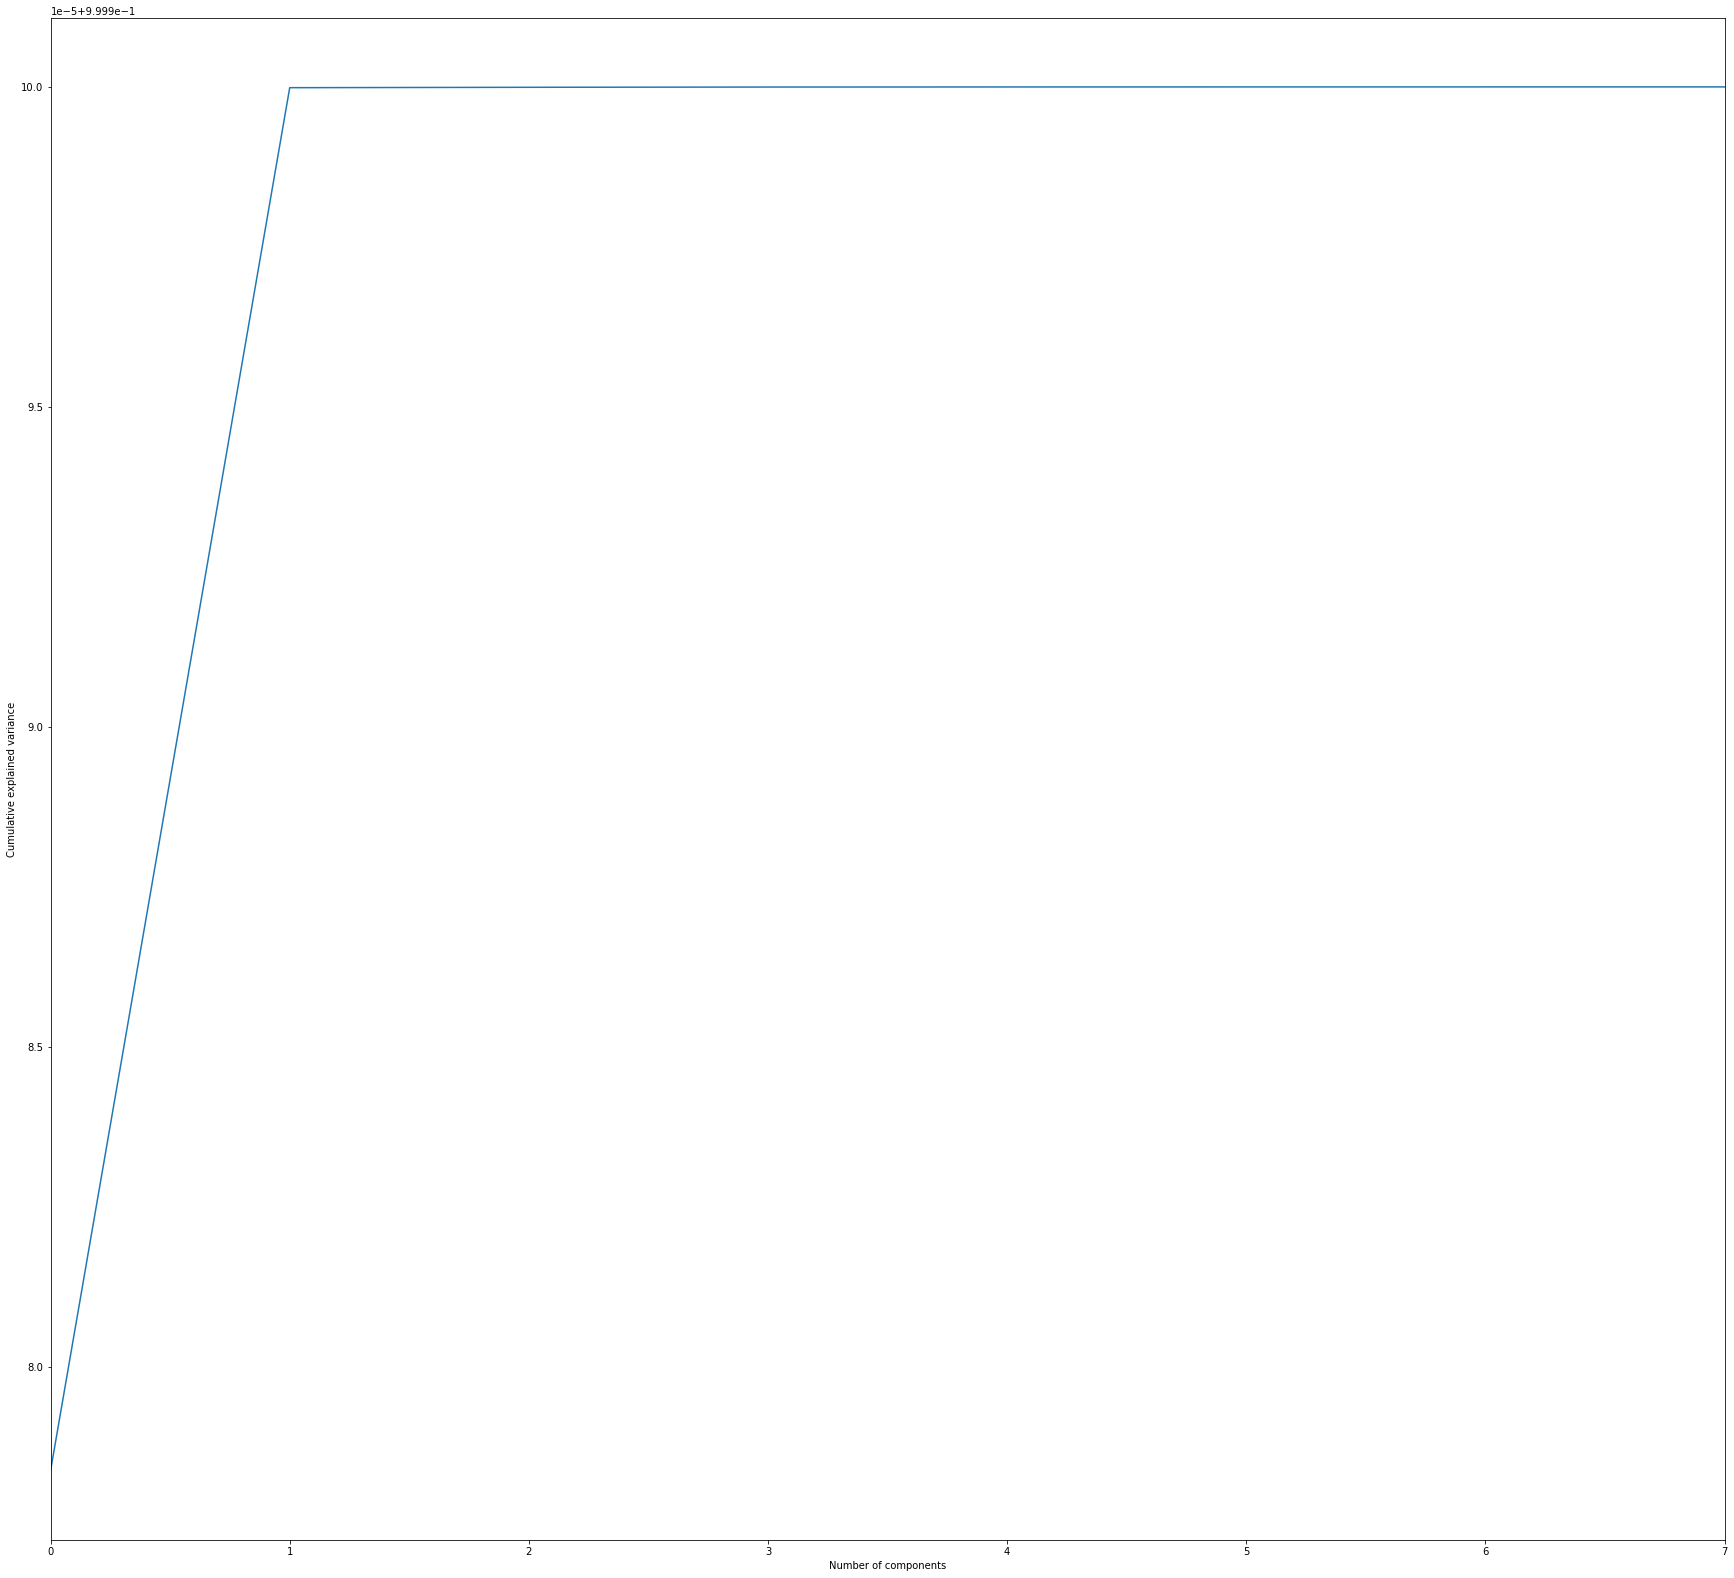

In [34]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [15]:
model=linear_model.LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_train)
max(y_predict)

68.89832957116438

In [ ]:
Y_test=model.predict(X_test)
y_Predict=list(y_test)

In [ ]:
error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Y_test[i])/y_Predict[i])
test_error_ridge=error/len(Y_test)*100
print("Test error = "'{}'.format(test_error_ridge)+" percent in Ridge Regression")

In [35]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [36]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)

#Predicting the SalePrices using test set 
y_pred_lr = lin_reg.predict(X_test)

#Mutiple Linear Regression Accuracy with test set
accuracy_lf = metrics.r2_score(y_test, y_pred_lr)
print('Mutiple Linear Regression Accuracy: ', accuracy_lf)

#Predicting the Corona using cross validation (KFold method)
y_pred_kf_lr = cross_val_predict(lin_reg, X, y, cv=10 )

#Mutiple Linear Regression Accuracy with cross validation (KFold method)
accuracy_lf = metrics.r2_score(y, y_pred_kf_lr)
print('Cross-Predicted(KFold) Mutiple Linear Regression Accuracy: ', accuracy_lf)

Mutiple Linear Regression Accuracy:  0.27942587259672347
Cross-Predicted(KFold) Mutiple Linear Regression Accuracy:  0.27778782520277534


In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})
df

,Actual,Predicted
4041,53.072883,51.422009
9305,52.406560,49.456676
10262,47.567603,51.313157
6057,48.914593,48.174332
7071,49.432939,50.040081
...,...,...
8326,47.534039,51.093030
5031,60.101496,56.905206
9950,96.655680,64.102147
3980,53.437809,51.947003


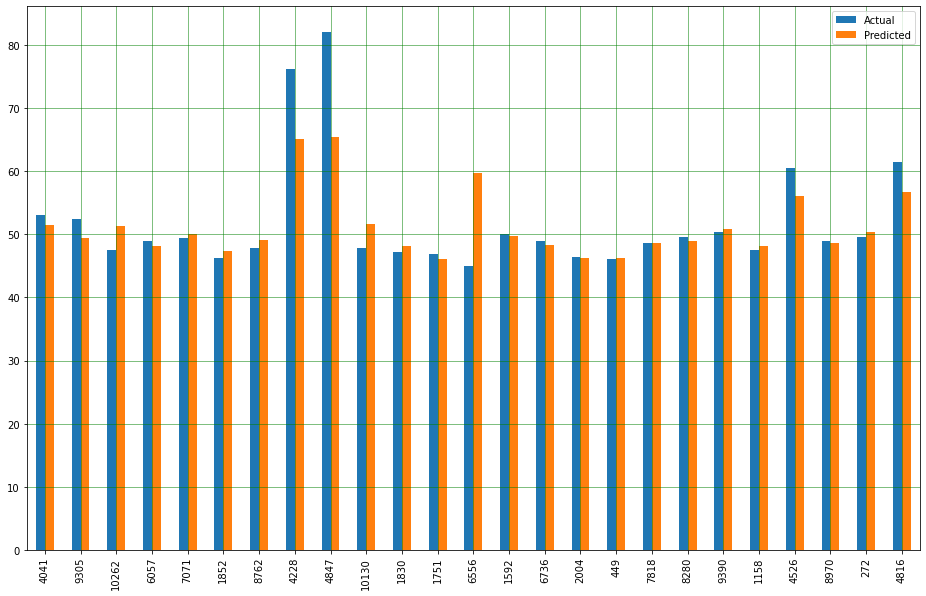

In [40]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()